<a href="https://colab.research.google.com/github/BassamTar99/StockPrediction/blob/main/Samir_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Sample data:
Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2018-01-02  40.479828  40.489230  39.774850  39.986346  102223600
2018-01-03  40.472790  41.017975  40.409344  40.543288  118071600
2018-01-04  40.660774  40.764172  40.437532  40.545627   89738400
2018-01-05  41.123726  41.210672  40.665491  40.757138   94640000
2018-01-08  40.970978  41.267067  40.872278  40.970978   82271200


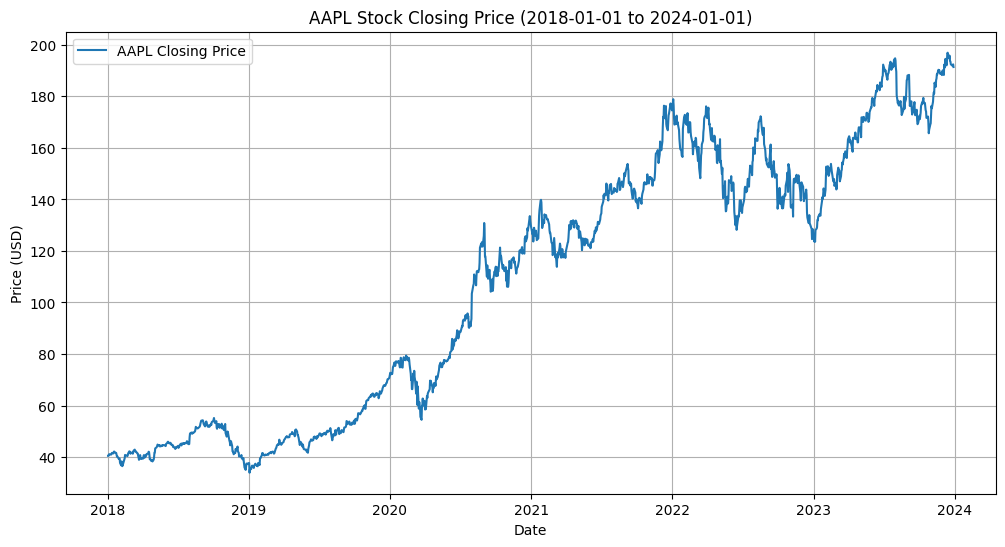

In [1]:
# Install yfinance (only once)
!pip install yfinance

# Import libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Define the stock and time range
ticker = "AAPL"  # You can change this to 'TSLA', 'AMZN', etc.
start_date = "2018-01-01"
end_date = "2024-01-01"

# Download historical stock data
df = yf.download(ticker, start=start_date, end=end_date)

# View the first few rows
print("Sample data:")
print(df.head())

# Plot the closing price
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label=f"{ticker} Closing Price")
plt.title(f"{ticker} Stock Closing Price ({start_date} to {end_date})")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()


In [2]:
# Use just the 'Close' column
data = df[['Close']].values  # shape: (num_days, 1)

# Normalize data using MinMaxScaler (scale to 0–1 range)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences for LSTM
sequence_length = 30  # Number of days to look back

X = []
y = []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i - sequence_length:i])  # 30 days
    y.append(scaled_data[i])                      # day 31

X = np.array(X)
y = np.array(y)

print(f"Shape of X: {X.shape}")  # (samples, 30, 1)
print(f"Shape of y: {y.shape}")  # (samples, 1)

# Split into training and test sets (e.g., 80% train / 20% test)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")


Shape of X: (1479, 30, 1)
Shape of y: (1479, 1)
Training samples: 1183
Testing samples: 296


In [3]:
# Import TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1156 - val_loss: 0.0073
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0024 - val_loss: 0.0012
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 8.8289e-04 - val_loss: 0.0011
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 8.2018e-04 - val_loss: 0.0012
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 8.4068e-04 - val_loss: 0.0013
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 8.0562e-04 - val_loss: 0.0011
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 8.1092e-04 - val_loss: 0.0011
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 7.2527e-04 - val_loss: 0.0014
Epoch 9/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 7.4906e-04 - val_loss: 0.0011
Epoch 10/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 7.4476e-04 - val_loss: 0.0010
Epoch 11/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 6.8299e-04 - val_loss: 0.0014
Epoch 12/20
37/37 ━━━━━━━━━━━━━━━━━━━━

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


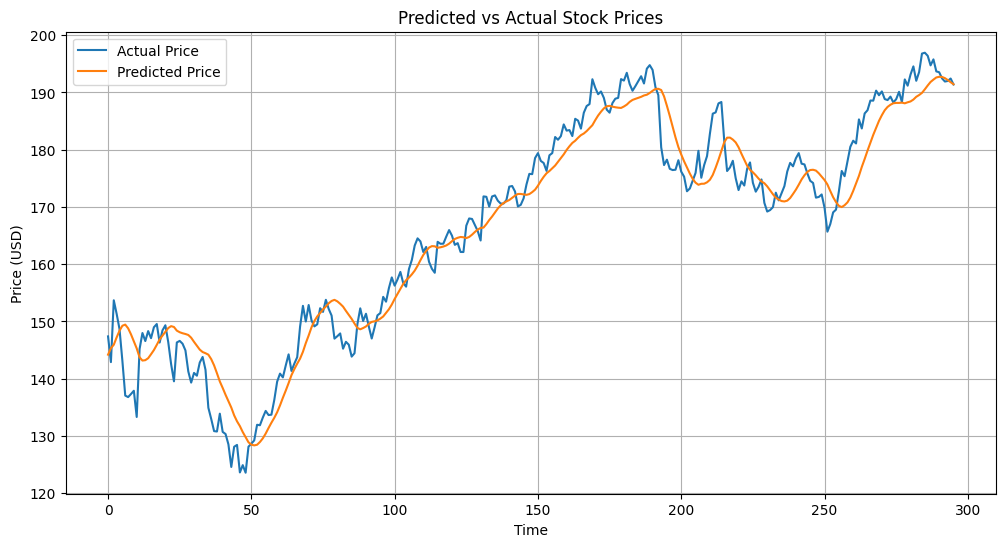

In [4]:
# Make predictions on test data
predictions = model.predict(X_test)

# Inverse transform predictions and actual values to original scale
predicted_prices = scaler.inverse_transform(predictions)
real_prices = scaler.inverse_transform(y_test)

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(real_prices, label="Actual Price")
plt.plot(predicted_prices, label="Predicted Price")
plt.title("Predicted vs Actual Stock Prices")
plt.xlabel("Time")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()


In [5]:
# Get the last 30 days from the original scaled data
last_30_days = scaled_data[-30:]  # shape = (30, 1)

# Reshape to match LSTM input: (1 sample, 30 time steps, 1 feature)
input_sequence = np.reshape(last_30_days, (1, 30, 1))

# Predict the next day's scaled price
predicted_scaled = model.predict(input_sequence)

# Inverse-transform to get actual price
predicted_price = scaler.inverse_transform(predicted_scaled)

print(f"\n📅 Predicted Closing Price for Tomorrow: ${predicted_price[0][0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step

📅 Predicted Closing Price for Tomorrow: $191.01


In [6]:
# Get a few days after the original end date
check_df = yf.download(ticker, start="2024-01-01", end="2024-01-05")

# Show the actual next closing price
print("\n📉 Actual Closing Price After Prediction Day:")
print(check_df[['Close']])


[*********************100%***********************]  1 of 1 completed


📉 Actual Closing Price After Prediction Day:
Price            Close
Ticker            AAPL
Date                  
2024-01-02  184.532089
2024-01-03  183.150391
2024-01-04  180.824356
